In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()  # for plot styling
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

#importing the dataset
data = pd.read_csv('driver-data.csv')
print (data.shape)
print (data.head)

(4000, 3)
<bound method NDFrame.head of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>


In [10]:
data.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [11]:
newdata=data.iloc[:,1:3]
newdata

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [19]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.cluster_centers_
print(len(kmeans.cluster_centers_))

print (kmeans.labels_)
print (len(kmeans.labels_))

print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

3
[0 0 0 ... 1 1 1]
4000
<class 'numpy.ndarray'>
{0: 3200, 1: 696, 2: 104}


c:\users\akshaysh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


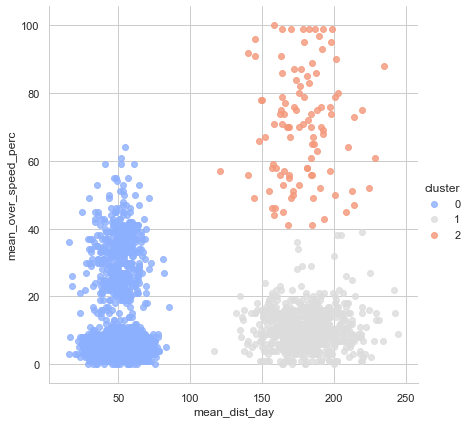

In [20]:
# plot the data 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc',data=newdata, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)